# MOVIE REVIEW SENTIMENT ANALYSIS USING NLP and K-NN Algorithm

## **Background**
Dalam industri perfilman, ulasan penonton menjadi faktor penting yang mempengaruhi kesuksesan sebuah film. Ulasan ini tidak hanya memberikan pandangan tentang kualitas film tetapi juga membantu menarik lebih banyak penonton melalui rekomendasi dari mulut ke mulut dan platform ulasan online. Dataset "Movie Reviews" yang terdiri dari 32.937 ulasan positif dan 31.783 ulasan negatif menawarkan wawasan berharga tentang sentimen penonton terhadap berbagai film. Dataset ini mencakup beberapa kolom seperti `fold_id`, `cv_tag`, `html_id`, `sent_id`, `text`, dan `tag`, dengan `tag` sebagai target yang berisi label positif dan negatif. Analisis sentimen pada ulasan ini bisa memberikan wawasan mendalam mengenai persepsi publik terhadap film, yang sangat berguna bagi studio, distributor, dan pemasar dalam industri film.

## **Masalah Bisnis**
Studio film dan perusahaan distribusi menghadapi tantangan besar dalam memahami dan mengelola ulasan film dari berbagai platform online. Mengingat volume besar ulasan yang dihasilkan setiap hari, sulit bagi perusahaan untuk secara manual mengidentifikasi tren sentimen yang penting. Kurangnya pemahaman yang cepat dan akurat tentang sentimen penonton dapat menyebabkan keputusan yang tidak optimal, baik dalam hal pemasaran, distribusi, maupun produksi film di masa depan. Selain itu, kesalahan dalam menilai sentimen penonton bisa mengakibatkan strategi pemasaran yang tidak tepat, yang dapat berdampak negatif pada performa box office dan reputasi film.

## **Goal**
Tujuan dari penggunaan dataset "Movie Reviews" adalah untuk mengembangkan model analisis sentimen yang mampu secara otomatis mengklasifikasikan ulasan film sebagai positif atau negatif. Dengan model ini, perusahaan dapat:
1. **Meningkatkan Pemahaman Sentimen Penonton:** Mendapatkan wawasan mendalam tentang bagaimana penonton merespons film tertentu, yang dapat digunakan untuk mengukur keberhasilan film dan menentukan strategi pemasaran yang lebih efektif.
2. **Mengidentifikasi Tren dan Pola Sentimen:** Menganalisis pola sentimen terhadap berbagai genre atau film dari waktu ke waktu untuk mendukung keputusan bisnis terkait produksi dan distribusi film.
3. **Mengoptimalkan Strategi Pemasaran:** Menggunakan hasil analisis sentimen untuk menyesuaikan kampanye pemasaran, dengan fokus pada elemen yang disukai atau mengatasi kritik yang umum dari penonton.

Dengan mencapai tujuan ini, perusahaan dapat meningkatkan efisiensi operasional dan pengambilan keputusan, serta memaksimalkan dampak positif ulasan film terhadap kesuksesan komersial film tersebut.

# Movie Review Sentiment Analysis Dataset: Project Pipeline

The various steps involved in the Machine Learning Pipeline are:

- Import Necessary Dependencies
- Read and Load the Dataset
- Exploratory Data Analysis
- Data Visualization of Target Variables
- Data Celaning Process
- Splitting our data into Train and Test sets.
- Transforming Dataset using TF-IDF Vectorizer
- Function for Model Evaluation
- Model Building



Referensi :
https://www.analyticsvidhya.com/blog/2021/06/twitter-sentiment-analysis-a-nlp-use-case-for-beginners/

https://github.com/yrtnsari/Sentiment-Analysis-NLP-with-Python/blob/main/shopee2021.ipynb


## Step-1: Import the Necessary Dependencies

## Step-2: Read and Load the Dataset

In [311]:
import pandas as pd
path = "D:\\1.Data Science\\project\\movie_review\\movie_review_sampled.csv"
df = pd.read_csv(path)

In [312]:
df

,fold_id,cv_tag,html_id,sent_id,text,tag
0,0,cv097,24970,29,non-traditional relationships are presented as...,pos
1,8,cv834,22195,24,"the genuine "" gifts of healing "" listed in 1 c...",pos
2,8,cv807,21740,35,the film's strength is in how all the characte...,pos
3,3,cv391,10802,3,"but then again , not every film's supposed to ...",pos
4,0,cv045,23923,21,"chris blackwell , founder of palm pictures , w...",pos
...,...,...,...,...,...,...
1995,2,cv219,19874,26,salma hayek is wasted as the romantic interest...,neg
1996,8,cv858,20266,17,this is something that rears its ugly head at ...,neg
1997,5,cv549,22771,8,"for robbin's it may be a nice achievement , bu...",neg
1998,7,cv782,21078,11,.,neg


In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   fold_id  2000 non-null   int64 
 1   cv_tag   2000 non-null   object
 2   html_id  2000 non-null   int64 
 3   sent_id  2000 non-null   int64 
 4   text     2000 non-null   object
 5   tag      2000 non-null   object
dtypes: int64(3), object(3)
memory usage: 93.9+ KB


In [314]:
df

,fold_id,cv_tag,html_id,sent_id,text,tag
0,0,cv097,24970,29,non-traditional relationships are presented as...,pos
1,8,cv834,22195,24,"the genuine "" gifts of healing "" listed in 1 c...",pos
2,8,cv807,21740,35,the film's strength is in how all the characte...,pos
3,3,cv391,10802,3,"but then again , not every film's supposed to ...",pos
4,0,cv045,23923,21,"chris blackwell , founder of palm pictures , w...",pos
...,...,...,...,...,...,...
1995,2,cv219,19874,26,salma hayek is wasted as the romantic interest...,neg
1996,8,cv858,20266,17,this is something that rears its ugly head at ...,neg
1997,5,cv549,22771,8,"for robbin's it may be a nice achievement , bu...",neg
1998,7,cv782,21078,11,.,neg


## Step-3: Exploratory Data Analysis

3.1: Five top records of data

In [315]:
df.head()

,fold_id,cv_tag,html_id,sent_id,text,tag
0,0,cv097,24970,29,non-traditional relationships are presented as...,pos
1,8,cv834,22195,24,"the genuine "" gifts of healing "" listed in 1 c...",pos
2,8,cv807,21740,35,the film's strength is in how all the characte...,pos
3,3,cv391,10802,3,"but then again , not every film's supposed to ...",pos
4,0,cv045,23923,21,"chris blackwell , founder of palm pictures , w...",pos


3.2: Columns/features in data

In [316]:
df.columns

Index(['fold_id', 'cv_tag', 'html_id', 'sent_id', 'text', 'tag'], dtype='object')

3.3: Length of the dataset

In [317]:
print('length of data is', len(df))

length of data is 2000


3.4: Shape of data

In [318]:
df. shape

(2000, 6)

3.5: Data information

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   fold_id  2000 non-null   int64 
 1   cv_tag   2000 non-null   object
 2   html_id  2000 non-null   int64 
 3   sent_id  2000 non-null   int64 
 4   text     2000 non-null   object
 5   tag      2000 non-null   object
dtypes: int64(3), object(3)
memory usage: 93.9+ KB


3.6: Datatypes of all columns

In [320]:
df.dtypes

fold_id     int64
cv_tag     object
html_id     int64
sent_id     int64
text       object
tag        object
dtype: object

3.7: Checking for null values

In [321]:
import numpy as np
np.sum(df.isnull().any(axis=1))

0

3.8: Rows and columns in the dataset

In [322]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   2000


3.9: Check unique target values

In [323]:
df['tag'].unique()

array(['pos', 'neg'], dtype=object)

3.10: Check the number of target values

In [324]:
df['tag'].nunique()

2

## Step-4: Data Visualization of Target Variables

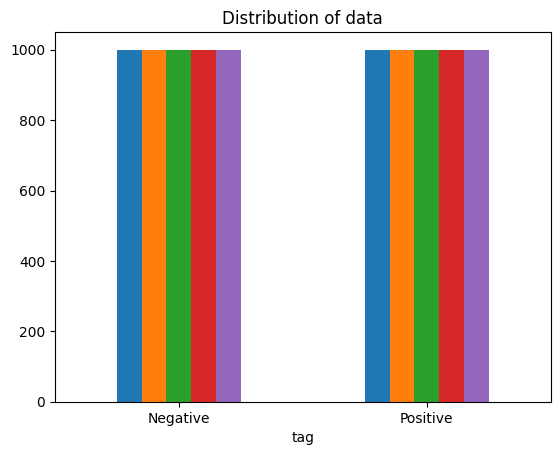

In [325]:
# Plotting the distribution for dataset.
ax = df.groupby('tag').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['tag'])

Have balanced data

Perform encoding by creating a new column as a target that has been encoded

In [326]:
def categorize_tag(tag):
    if tag == "pos":
        return 1
    else:
        return 0

# Buat kolom baru 'target' dan isi dengan nilai hasil dari fungsi categorize_tag
df['target'] = df['tag'].apply(categorize_tag)

# Tampilkan DataFrame hasil
display(df)


,fold_id,cv_tag,html_id,sent_id,text,tag,target
0,0,cv097,24970,29,non-traditional relationships are presented as...,pos,1
1,8,cv834,22195,24,"the genuine "" gifts of healing "" listed in 1 c...",pos,1
2,8,cv807,21740,35,the film's strength is in how all the characte...,pos,1
3,3,cv391,10802,3,"but then again , not every film's supposed to ...",pos,1
4,0,cv045,23923,21,"chris blackwell , founder of palm pictures , w...",pos,1
...,...,...,...,...,...,...,...
1995,2,cv219,19874,26,salma hayek is wasted as the romantic interest...,neg,0
1996,8,cv858,20266,17,this is something that rears its ugly head at ...,neg,0
1997,5,cv549,22771,8,"for robbin's it may be a nice achievement , bu...",neg,0
1998,7,cv782,21078,11,.,neg,0


<Axes: xlabel='target', ylabel='count'>

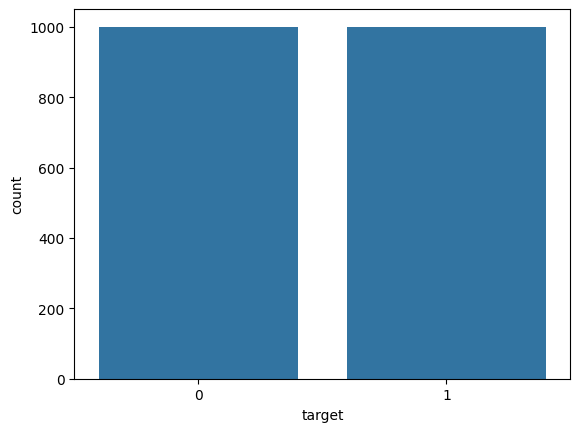

In [327]:
import seaborn as sns
sns.countplot(x='target', data=df)

## Step-5: Preprocessing Data

In [363]:
data = df[["text","target"]]
data

In [330]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


def clean_text(text):
    # Menghapus URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Menghapus mentions dan hashtag
    text = re.sub(r'\@\w+|\#', '', text)

    # Menghapus angka
    text = re.sub(r'\d+', '', text)

    # Menghapus karakter non-alphabetic (karakter khusus, tanda baca, dll.)
    text = re.sub(r'\W', ' ', text)

    # Menghapus karakter tunggal (misalnya 'b', 'c', dll.)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Menghapus spasi ganda
    text = re.sub(r'\s+', ' ', text).strip()

    # Mengubah ke huruf kecil
    text = text.lower()

    # Tokenisasi
    text = word_tokenize(text)

    # Menghapus stopwords
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]

    # Menggabungkan kembali teks yang telah dibersihkan menjadi satu string
    return ' '.join(text)

# Terapkan fungsi pembersihan pada kolom 'text'
data.loc[:,'clean_text'] = data['text'].apply(clean_text)

# Menampilkan hasil pembersihan
print(data[['text', 'clean_text']].head())


                                                text  \
0  non-traditional relationships are presented as...   
1  the genuine " gifts of healing " listed in 1 c...   
2  the film's strength is in how all the characte...   
3  but then again , not every film's supposed to ...   
4  chris blackwell , founder of palm pictures , w...   

                                          clean_text  
0  non traditional relationship presented matter ...  
1  genuine gift healing listed corinthian one nin...  
2  film strength character shown one good bad jud...  
3              every film supposed leave entertained  
4  chris blackwell founder palm picture also invo...  


## Step-6 Representasi Teks (convert to numerik) Using TF-IDF (Term Frequency-Inverse Document Frequency)

- Konsep: TF-IDF adalah metode yang mempertimbangkan frekuensi kemunculan kata dalam dokumen (Term Frequency, TF) dan juga memperhatikan seberapa unik kata tersebut dalam seluruh korpus (Inverse Document Frequency, IDF). Kata yang sering muncul dalam beberapa dokumen tetapi jarang muncul di dokumen lain dianggap lebih penting.

In [331]:
# !pip install scikit-learn

In [332]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Terapkan ke teks yang telah dibersihkan
X_tfidf = tfidf_vectorizer.fit_transform(data['clean_text']).toarray()

# Menampilkan beberapa kata fitur yang dihasilkan
print(tfidf_vectorizer.get_feature_names_out()[:10])
print(X_tfidf[:5])  # Menampilkan vektor dari beberapa dokumen pertama


['_armageddon_' 'abandoned' 'ability' 'able' 'aboard' 'abolitionist'
 'absent' 'absolutely' 'absorbed' 'absurdity']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Step 7 Modelling

###  Pembagian Data (Train-Test Split)

In [350]:
from sklearn.model_selection import train_test_split

# X adalah fitur (TF-IDF representation of the text)
X = X_tfidf

# y adalah target (label sentimen)
y = data['target']

# Pembagian data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Melatih Model Naive Bayes

In [351]:
from sklearn.naive_bayes import MultinomialNB

# Inisialisasi model Naive Bayes
model = MultinomialNB()

# Melatih model dengan data latih
model.fit(X_train, y_train)


MultinomialNB()

In [352]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prediksi pada data latih
y_train_pred = model.predict(X_train)

# Mengukur akurasi pada data latih
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Akurasi pada Data Latih: {train_accuracy}')

# Matriks kebingungan pada data latih
train_cm = confusion_matrix(y_train, y_train_pred)
print('Confusion Matrix pada Data Latih:')
print(train_cm)

# Laporan klasifikasi pada data latih
train_report = classification_report(y_train, y_train_pred)
print('Classification Report pada Data Latih:')
print(train_report)


Akurasi pada Data Latih: 0.953125
Confusion Matrix pada Data Latih:
[[760  39]
 [ 36 765]]
Classification Report pada Data Latih:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       799
           1       0.95      0.96      0.95       801

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600



In [353]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prediksi pada data uji
y_test_pred = model.predict(X_test)

# Mengukur akurasi
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Akurasi: {accuracy}')

# Matriks kebingungan
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Laporan klasifikasi
report = classification_report(y_test, y_test_pred)
print('Classification Report:')
print(report)


Akurasi: 0.5525
Confusion Matrix:
[[105  96]
 [ 83 116]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.52      0.54       201
           1       0.55      0.58      0.56       199

    accuracy                           0.55       400
   macro avg       0.55      0.55      0.55       400
weighted avg       0.55      0.55      0.55       400



### Support Vector Machine (SVM)

In [354]:
from sklearn.svm import LinearSVC

# Inisialisasi model SVM
svm_model = LinearSVC()

# Melatih model dengan data latih
svm_model.fit(X_train, y_train)



LinearSVC()

In [355]:
# Evaluasi model pada data uji
y_train_pred_svm = svm_model.predict(X_train)

# Mengukur akurasi
svm_Train_accuracy = accuracy_score(y_train, y_train_pred_svm)
print(f'Akurasi SVM: {svm_Train_accuracy}')

# Matriks kebingungan
svm_cm = confusion_matrix(y_train, y_train_pred_svm)
print('Confusion Matrix SVM:')
print(svm_cm)

# Laporan klasifikasi
svm_report = classification_report(y_train, y_train_pred_svm)
print('Classification Report SVM:')
print(svm_report)


Akurasi SVM: 0.99
Confusion Matrix SVM:
[[792   7]
 [  9 792]]
Classification Report SVM:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       799
           1       0.99      0.99      0.99       801

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



In [356]:
# Evaluasi model pada data uji
y_test_pred_svm = svm_model.predict(X_test)

# Mengukur akurasi
svm_accuracy = accuracy_score(y_test, y_test_pred_svm)
print(f'Akurasi SVM: {svm_accuracy}')

# Matriks kebingungan
svm_cm = confusion_matrix(y_test, y_test_pred_svm)
print('Confusion Matrix SVM:')
print(svm_cm)

# Laporan klasifikasi
svm_report = classification_report(y_test, y_test_pred_svm)
print('Classification Report SVM:')
print(svm_report)


Akurasi SVM: 0.5325
Confusion Matrix SVM:
[[107  94]
 [ 93 106]]
Classification Report SVM:
              precision    recall  f1-score   support

           0       0.54      0.53      0.53       201
           1       0.53      0.53      0.53       199

    accuracy                           0.53       400
   macro avg       0.53      0.53      0.53       400
weighted avg       0.53      0.53      0.53       400



### LogisticRegression

In [357]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)

# Melatih model dengan data latih
logistic_model.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

In [358]:
# Evaluasi model pada data uji
y_train_pred_logistic = logistic_model.predict(X_train)

# Mengukur akurasi
logistic_train_accuracy = accuracy_score(y_train, y_train_pred_logistic)
print(f'Akurasi Logistic Regression: {logistic_train_accuracy}')

# Matriks kebingungan
logistic_cm = confusion_matrix(y_train, y_train_pred_logistic)
print('Confusion Matrix Logistic Regression:')
print(logistic_cm)

# Laporan klasifikasi
logistic_report = classification_report(y_train, y_train_pred_logistic)
print('Classification Report Logistic Regression:')
print(logistic_report)


Akurasi Logistic Regression: 0.941875
Confusion Matrix Logistic Regression:
[[760  39]
 [ 54 747]]
Classification Report Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       799
           1       0.95      0.93      0.94       801

    accuracy                           0.94      1600
   macro avg       0.94      0.94      0.94      1600
weighted avg       0.94      0.94      0.94      1600



In [359]:
# Evaluasi model pada data uji
y_pred_logistic = logistic_model.predict(X_test)

# Mengukur akurasi
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
print(f'Akurasi Logistic Regression: {logistic_accuracy}')

# Matriks kebingungan
logistic_cm = confusion_matrix(y_test, y_pred_logistic)
print('Confusion Matrix Logistic Regression:')
print(logistic_cm)

# Laporan klasifikasi
logistic_report = classification_report(y_test, y_pred_logistic)
print('Classification Report Logistic Regression:')
print(logistic_report)


Akurasi Logistic Regression: 0.535
Confusion Matrix Logistic Regression:
[[105  96]
 [ 90 109]]
Classification Report Logistic Regression:
              precision    recall  f1-score   support

           0       0.54      0.52      0.53       201
           1       0.53      0.55      0.54       199

    accuracy                           0.54       400
   macro avg       0.54      0.54      0.53       400
weighted avg       0.54      0.54      0.53       400



### KNN


In [360]:
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi dan latih model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Anda bisa menyesuaikan n_neighbors sesuai kebutuhan
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [361]:
# Prediksi pada data uji
y_pred_train_dt = dt_model.predict(X_train)

# Mengukur akurasi
accuracy = accuracy_score(y_train, y_pred_train_dt)
print(f'Akurasi Decision Tree: {accuracy}')

# Matriks kebingungan
cm = confusion_matrix(y_train, y_pred_train_dt)
print('Confusion Matrix Decision Tree:')
print(cm)

# Laporan klasifikasi
report = classification_report(y_train, y_pred_train_dt)
print('Classification Report Decision Tree:')
print(report)

Akurasi Decision Tree: 0.508125
Confusion Matrix Decision Tree:
[[355 444]
 [343 458]]
Classification Report Decision Tree:
              precision    recall  f1-score   support

           0       0.51      0.44      0.47       799
           1       0.51      0.57      0.54       801

    accuracy                           0.51      1600
   macro avg       0.51      0.51      0.51      1600
weighted avg       0.51      0.51      0.51      1600



In [362]:
# Prediksi pada data uji
y_pred_dt = dt_model.predict(X_test)

# Mengukur akurasi
accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Akurasi Decision Tree: {accuracy}')

# Matriks kebingungan
cm = confusion_matrix(y_test, y_pred_dt)
print('Confusion Matrix Decision Tree:')
print(cm)

# Laporan klasifikasi
report = classification_report(y_test, y_pred_dt)
print('Classification Report Decision Tree:')
print(report)

Akurasi Decision Tree: 0.545
Confusion Matrix Decision Tree:
[[ 98 103]
 [ 79 120]]
Classification Report Decision Tree:
              precision    recall  f1-score   support

           0       0.55      0.49      0.52       201
           1       0.54      0.60      0.57       199

    accuracy                           0.55       400
   macro avg       0.55      0.55      0.54       400
weighted avg       0.55      0.55      0.54       400

